## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd

dados_adv = pd.read_csv('Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [3]:
dados_por = pd.read_csv('Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [4]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [10]:
y_hat = reg.predict(X[0:4])
y_hat


array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

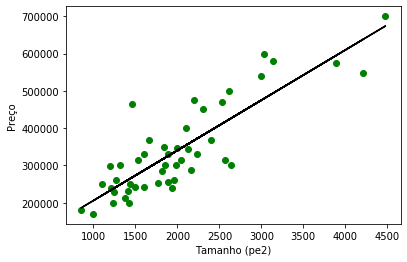

In [6]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [11]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [12]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851149


# Exercício 1



Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.








--------------------------
Solucao: 
* Neste codigo sera apresentado o conceito de Regressao Linear. A regressao Linear consiste em um algoritmo supervisionado, ou seja, baseado em dados de entradas e saidas, estipula a variavel algo (ou Target).

In [26]:
### Bibliotecas necessarias

import pandas as pd #biblioteca para manipulacao de dados
from sklearn.linear_model import LinearRegression #Treina o modelo para predicao       
from matplotlib import pyplot as plt  #visualizacao dos dados   
from sklearn.metrics import r2_score #Avaliacao por dados numericos (Em caso de multiplas dimensoes para predicao)   

### Variaveis utilizadas

##### Inicializacao da base
* dados_por  = Corresponde a base de dados estudada


##### Treinamento da base
* X = dados para treinamento do modelo
* y = Saidas do meu modelo. Sera utilizada para treinamento durante a execucao do fit.

* fit_function = Funcao de aproximacao estimada pelo algoritmo de regressao linear. 

####  Respostas de predicao
* resposta_modelo = Resposta Predita. Exibe as saidas preditas.

#### Avaliacao da qualidade dos valores preditos

r2 = determina o erro quadratico medio do modelo de regressao   
rss = determina a distancia entre o valor predito (dispostos linearmente: "reta") e o valor real   


* Visualizacao da base

In [29]:
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [100]:
X = dados_por.loc[:,['quartos']]  #atributo escolhido
y = dados_por.loc[:,['preco']]

fit_function = LinearRegression().fit(X,y)  #Treina o modelo
fit_function

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
resposta_modelo = fit_function.predict(X[0:5])  #faz a predicao
print("Precos segundo o modelo por regressao : \n", resposta_modelo)

Precos segundo o modelo por regressao : 
 [[328043.35782748]
 [328043.35782748]
 [328043.35782748]
 [255373.7100639 ]
 [400713.00559105]]


Text(0, 0.5, 'preco')

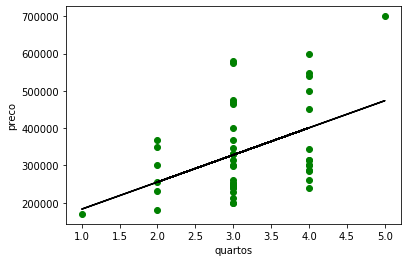

In [103]:
#Avaliacao visual

plt.scatter(X, y,color='g')
plt.plot(X, fit_function.predict(X),color='k')
plt.xlabel('quartos')
plt.ylabel('preco')

In [104]:
fit_function.predict(pd.DataFrame([2104]))

array([[1.53006973e+08]])

#### Avaliacao por metricas

In [105]:
# metricas para avaliacao do modelo
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [106]:
rss = calc_rss(y,fit_function.predict(X))  
r2 = calc_r2(y,fit_function.predict(X))
print(rss)
print(r2)

578535325112.5249
-3.112607855431998


1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?   

* Foi aprendido que a homogeneidade de distribuicao de dados (dados continuos) para treinamento do modelo pode apresentar melhores valores preditos

2) O RSS e R^2 corroboram suas impressões observando o modelo?

* O atributo pois o atributo tamanho aoresenta um melhor valor de r2 em relacao ao atributo de quarto

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [8]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'Preço')

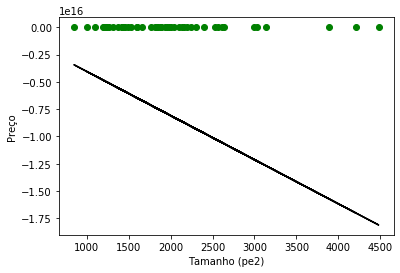

In [9]:
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 3

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

reg_grad = SGDRegressor(max_iter=3,alpha=0,warm_start=True) 


/home/leno/anaconda3/envs/leno/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Text(0, 0.5, 'Preço')

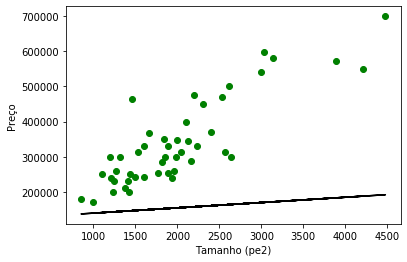

In [34]:
reg_grad.fit(X_scaled,y.values.ravel())

plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X_scaled),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

/home/leno/anaconda3/envs/leno/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/leno/anaconda3/envs/leno/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/leno/anaconda3/envs/leno/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/leno/anaconda3/envs/leno/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

Text(0, 0.5, 'Preço')

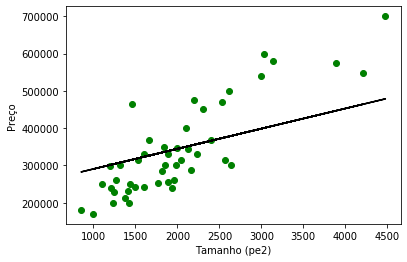

In [36]:
for i in range(10):
    reg_grad.fit(X_scaled,y.values.ravel())

plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X_scaled),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

## Exercício 4


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [42]:
from sklearn.linear_model import LinearRegression
X_tv = dados_adv.loc[:,['TV']]
X_ra = dados_adv.loc[:,['radio']]
X_ne = dados_adv.loc[:,['newspaper']]
X_tv_ra = dados_adv.loc[:,['TV','radio']]
X_tv_ne = dados_adv.loc[:,['TV','newspaper']]
X_ra_ne = dados_adv.loc[:,['radio','newspaper']]
X_all = dados_adv.loc[:,['TV','radio','newspaper']]


y_adv = dados_adv.loc[:,['sales']]

lin_reg = LinearRegression().fit(X_tv,y_adv)
r2_tv = calc_r2(y_adv,lin_reg.predict(X_tv))

lin_reg = LinearRegression().fit(X_ra,y_adv)
r2_ra = calc_r2(y_adv,lin_reg.predict(X_ra))

lin_reg = LinearRegression().fit(X_ne,y_adv)
r2_ne = calc_r2(y_adv,lin_reg.predict(X_ne))

lin_reg = LinearRegression().fit(X_tv_ra,y_adv)
r2_tv_ra = calc_r2(y_adv,lin_reg.predict(X_tv_ra))

lin_reg = LinearRegression().fit(X_tv_ne,y_adv)
r2_tv_ne = calc_r2(y_adv,lin_reg.predict(X_tv_ne))

lin_reg = LinearRegression().fit(X_ra_ne,y_adv)
r2_ra_ne = calc_r2(y_adv,lin_reg.predict(X_ra_ne))

lin_reg = LinearRegression().fit(X_all,y_adv)
r2_all = calc_r2(y_adv,lin_reg.predict(X_all))

print("R^2 de acordo com os atributos")
print("TV:         " + str(r2_tv))
print("Radio:      " + str(r2_ra))
print("Newspaper:  " + str(r2_ne))
print("TV + Rad:   " + str(r2_tv_ra))
print("TV + News:  " + str(r2_tv_ne))
print("Rad + News: " + str(r2_ra_ne))
print("Todos:      " + str(r2_all))


R^2 de acordo com os atributos
TV:         0.3656794003764149
Radio:      -1.0117537716572929
Newspaper:  -17.186328732907356
TV + Rad:   0.8854141813245441
TV + News:  0.4516180830032447
Rad + News: -1.0056640179953233
Todos:      0.8854345262449441


In [49]:
import time

repeticoes = 1000

start_time = time.time()
for i in range(repeticoes):
    lin_reg = LinearRegression().fit(X_all,y_adv)
elapsed_time = time.time() - start_time

print("Tempo método mínimos quadrados: " +str(elapsed_time))

scaler = MinMaxScaler()
scaler.fit(X_all)
X_scaled = scaler.transform(X_all)
y_sgd = y_adv.values.ravel()
start_time = time.time()
for i in range(repeticoes):
    lin_reg = SGDRegressor(alpha=0).fit(X_scaled,y_sgd)
elapsed_time = time.time() - start_time

print("Tempo descida do gradiente:     " +str(elapsed_time))



Tempo método mínimos quadrados: 2.1342742443084717
Tempo descida do gradiente:     7.572299242019653
